In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("C:\\Users\\Rohit Kr\\Desktop\\machine Learning\\Advertising.csv", index_col = 0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


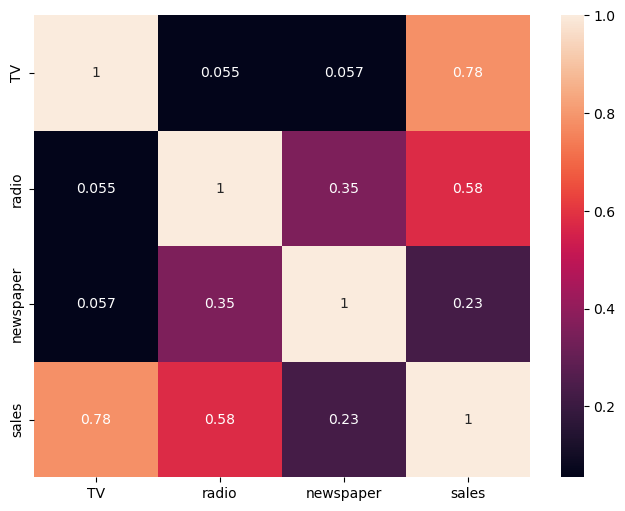

In [4]:
correlation = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True)
plt.show()

In [5]:
feature_cols = ["TV","radio"]
x = df[feature_cols]
y = df.sales

In [8]:
from sklearn import model_selection as ms
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [9]:
from sklearn.preprocessing import StandardScaler # fit vs transform vs fit_transform
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [12]:
print(f" The intercept is {lm.intercept_}")  # Give the intercept
print(f" The coffiecient is {lm.coef_}")  # Give the coefficient 

 The intercept is 14.497142857142858
 The coffiecient is [3.68485252 2.9546419 ]


In [13]:
preds_train = lm.predict(x_train)
preds_test = lm.predict(x_test)

preds_train


array([17.51643183, 15.2422407 , 11.33929011, 10.99811715, 16.48159017,
        6.93440865, 21.39090809,  6.11339242,  9.74997496, 11.86761848,
        9.20799892,  6.37262183, 14.80895506, 17.4063397 , 15.85429073,
       16.24990933, 15.07261838, 19.8819103 , 13.51162734, 21.19013119,
       12.89534767, 13.9232009 ,  8.79715282, 17.07558394,  8.35359935,
       15.08130811, 13.86832995, 23.47599359, 12.90576572, 23.00629412,
        6.64086843, 18.547643  , 23.25673338, 18.59667832, 17.16356313,
       16.64876011, 12.37055022, 12.0175313 , 16.80410686, 14.49558045,
       12.99494578,  7.42584551, 19.28318391,  9.40662217, 19.54506826,
       10.07642342,  6.92624383, 16.52571818, 13.70213726, 14.89961366,
       11.24457485, 20.63831263, 23.84739538, 18.43151438, 17.8131536 ,
       15.27369657, 17.28768189,  9.15092452, 17.50015453, 19.29467879,
       16.28138966,  3.49607297,  5.36856008, 15.78982791, 15.13467606,
       16.3245151 , 18.33995278, 23.48490949, 14.23805234, 20.52

In [14]:
from sklearn.metrics import r2_score,mean_squared_error
print(f" RMSE for train data is :{np.sqrt(mean_squared_error(y_train,preds_train))}")
print(f" R2 for train data is : {r2_score(y_train,preds_train)}")
print(f" RMSE for test data is :{np.sqrt(mean_squared_error(y_test,preds_test))}")
print(f" R2 for test data is : {r2_score(y_test,preds_test)}")

 RMSE for train data is :1.5802375959959862
 R2 for train data is : 0.9048377867980044
 RMSE for test data is :1.9154756731764255
 R2 for test data is : 0.8656253548947074


In [15]:
import statsmodels.api as sm

model_trained = sm.OLS(y_train ,sm.add_constant(preds_train)).fit()
print(f"Adj R2 for train data = {model_trained.rsquared_adj}")

model_trained = sm.OLS(y_test ,sm.add_constant(preds_test)).fit()
print(f"Adj R2 for test data = {model_trained.rsquared_adj}")

Adj R2 for train data = 0.9041482055429175
Adj R2 for test data = 0.8636727012475173


In [16]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     651.3
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           1.06e-70
Time:                        11:52:25   Log-Likelihood:                -262.71
No. Observations:                 140   AIC:                             531.4
Df Residuals:                     137   BIC:                             540.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4971      0.135    107.379      0.000      14.230      14.764
x1             3.6849      0.135     27.234      0.000       3.417       3.952
x2             2.9546      0.135     21.837      0.000       2.687       3.222
==============================================================================
Omnibus:                       72.173   Durbin-Watson:                   2.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.670
Skew:                          -1.780   Prob(JB):                     9.77e-83
Kurtosis:                      10.216   Cond. No.                         1.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""